In [1]:
import sys
import os
sys.path.insert(0, '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/PES_plotter/PyEnergyDiagram/')
sys.path.insert(0, '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/PES_plotter')

import cantera as ct
from IPython.display import Image
%matplotlib inline
from subprocess import run
from pathlib import Path


import pes_plot
import numpy as np
import collections
import warnings
import matplotlib.pyplot as plt
import re
warnings.filterwarnings('ignore')
import pandas as pd

/home/xu.chao/anaconda3/envs/rmg_env/lib/python3.7/site-packages/cantera/__init__.py


In [2]:
yml_path = '/work/westgroup/chao/sketches/cpox_sim/bm_models_final/base_original/binding_energies/1.0_c-5.50o-3.25/cantera.yaml'
pes_plot_1 = pes_plot.pes_plot(yml_path, 800, ct.one_atm)
pes_plot_1.surf.TP=800,ct.one_atm

In [3]:
df_bm = pd.read_csv('rates_of_progress/net_rates_0.6.csv')
df_or = pd.read_csv('/work/westgroup/chao/bm_project/base_original/binding_energies/10.0_c-5.75o-3.25/rates_of_progress/net_rates_0.6.csv')

[]

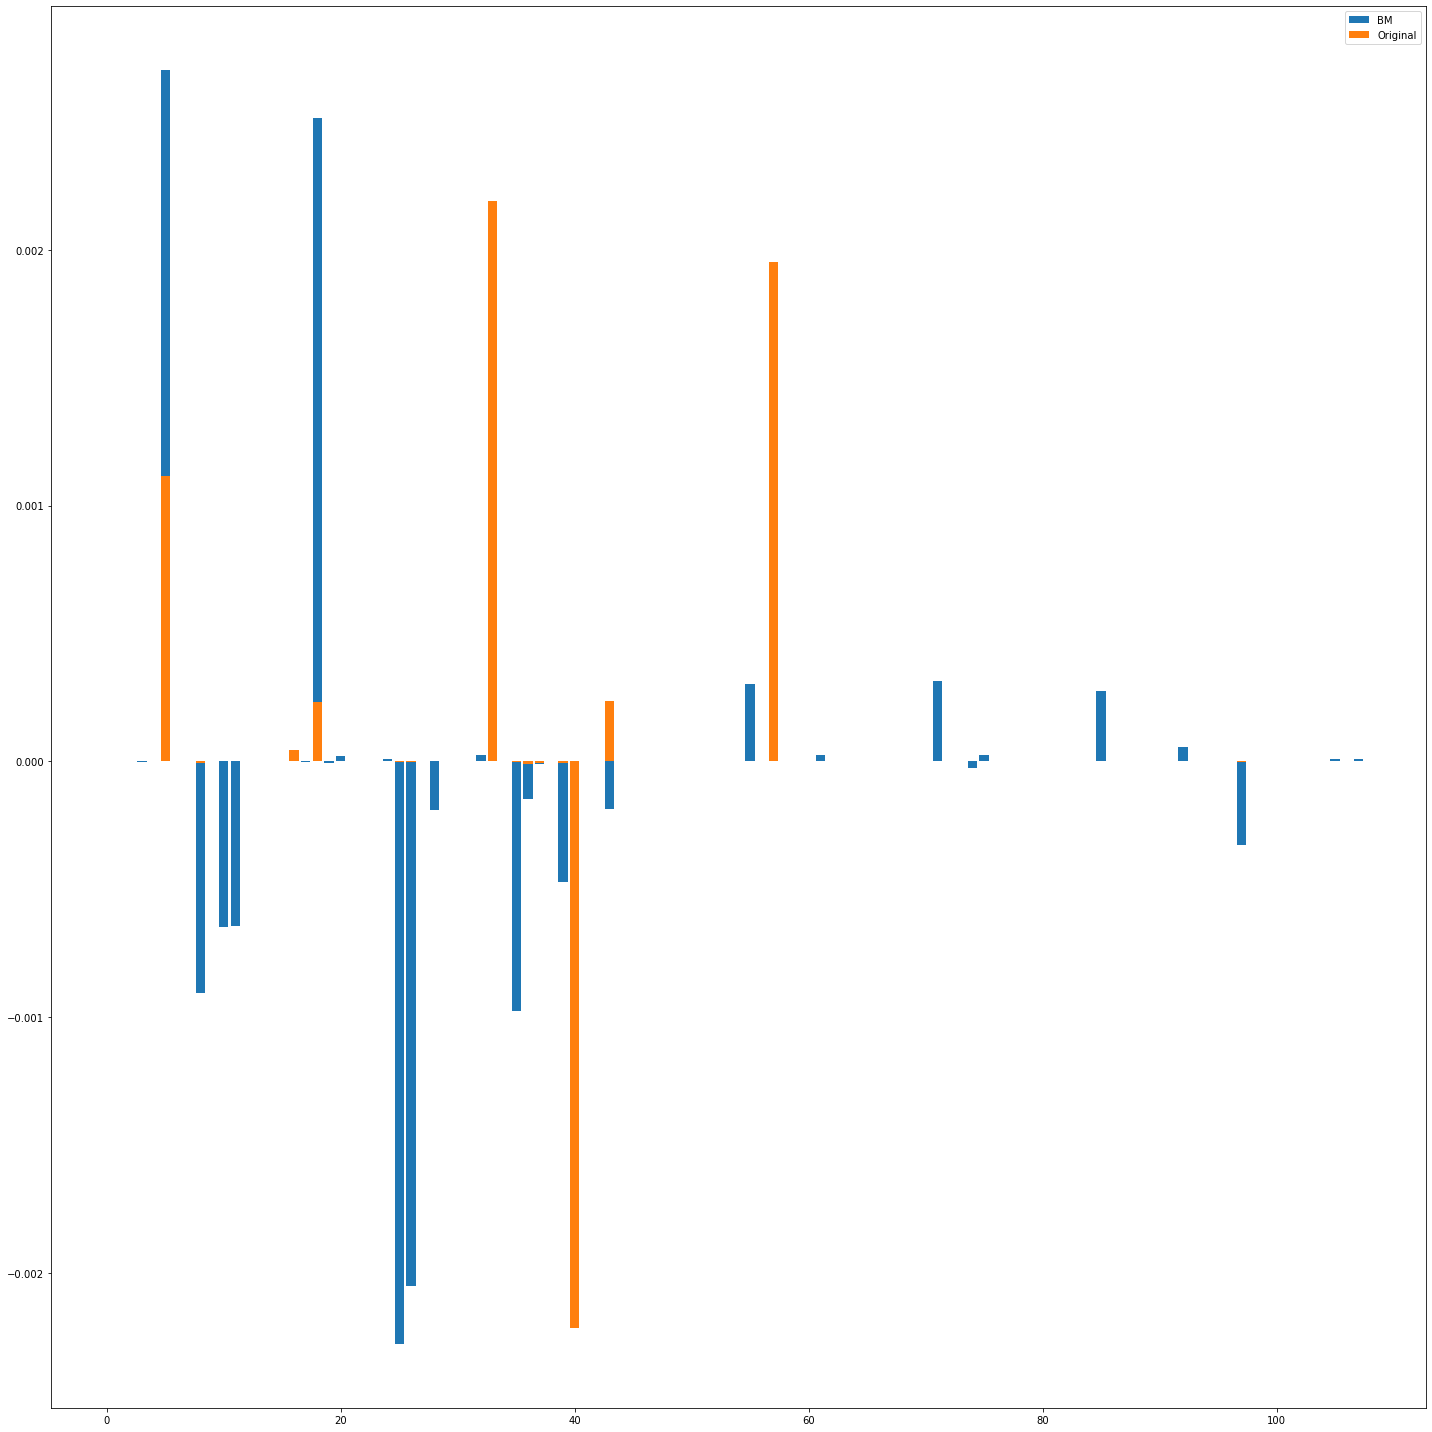

In [55]:
rates_bm = np.array([df_bm.iloc[1000, i] for i in range(1,108)])
rates_or = np.array([df_or.iloc[1000, i] for i in range(1,108)])
plt.figure(figsize=(20, 20))
# plt.bar(range(1, 108), np.log10(np.abs(rates_bm)), label='BM')
# plt.bar(range(1, 108), np.log10(np.abs(rates_or)), label='Original')
plt.bar(range(1, 108), rates_bm, label='BM')
plt.bar(range(1, 108), rates_or, label='Original')
plt.legend()
plt.tight_layout()
plt.plot()

# for i in range(1, 107):
#     rates_bm = df_bm.iloc[1045, i]
#     rates_or = df_or.iloc[1045, i]
#     plt.plot(list(rates_bm.index), rates_bm, label='BM')
#     plt.plot(list(rates_bm.index), rates_or, label='Original')
#     plt.title(str(pes_plot_1.surf.reaction(i).equation))
#     plt.legend()
#     plt.show()

In [57]:
# diff = np.log10(np.abs(rates_bm)) - np.log10(np.abs(rates_or))
diff = (rates_or - rates_bm) / rates_or 
diff
for i, v in enumerate(diff):
    if v >= 0:
        print(i)
        print(pes_plot_1.surf.reaction(i))
        print(v)

3
CO(7) + X(1) <=> COX(23)
47438.13269923983
6
CH4(2) + 2 X(1) <=> CH3X(27) + HX(21)
0.945564014951723
15
CH4(2) + OX(25) + X(1) <=> CH3X(27) + OHX(31)
0.7699052033332271
32
CH4(2) + X(1) <=> CH4X(24)
0.08952783116870107
39
CH3OH(14) + 2 X(1) <=> CH3X(27) + OHX(31)
0.7616499927777689
41
C2H4(18) + 2 X(1) <=> 2 CH2X(26)
219465.16646348548
42
CH4X(24) + X(1) <=> CH3X(27) + HX(21)
1.7949114891891413
56
CH4X(24) + OX(25) <=> CH3X(27) + OHX(31)
0.07484982437495868
61
2 CH2X(26) <=> CH3X(27) + CHX(28)
714445673930010.2
64
C2H4(62) + 2 X(1) <=> CH3X(27) + CHX(28)
295142139741.8482
68
CH3OH(14) + 2 X(1) <=> CH3O_X(45) + HX(21)
0.9984683797451189
76
CH4OX(43) + HX(21) <=> CH3X(27) + H2OX(32)
12.620214155573288
80
C2H4(62) + 2 X(1) <=> C2H3X(244) + HX(21)
143411.4405316262
87
CH2O_X(46) + CHX(28) <=> CH2X(26) + CHOX(33)
1415568995638.76
88
CH2O_X(46) + CH2X(26) <=> CH3X(27) + CHOX(33)
3816137.261083038
97
CH2O_X(46) + CH3X(27) <=> CH2X(26) + CH3O_X(45)
9653.889512630363
99
CH2O_X(46) + CH2X(26) 

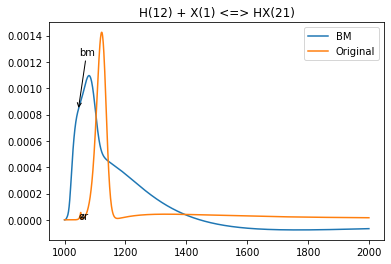

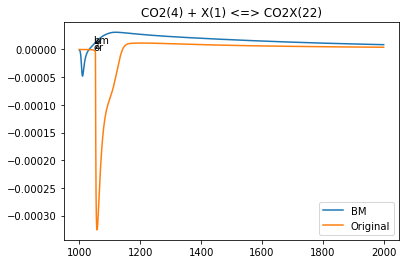

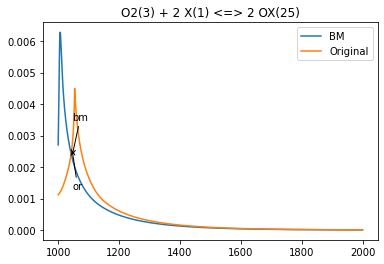

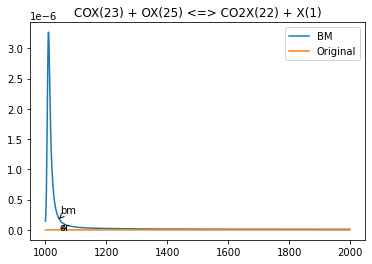

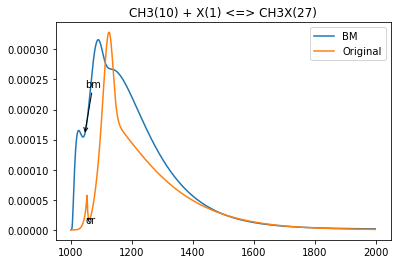

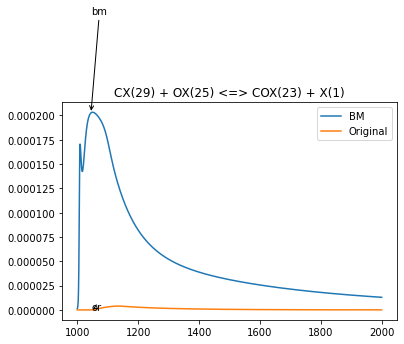

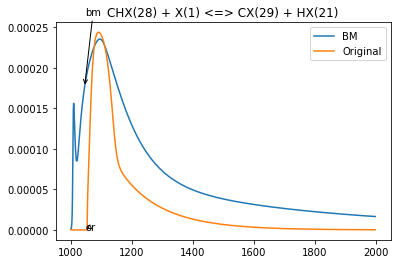

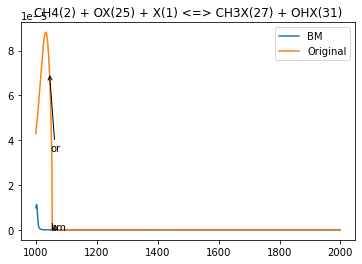

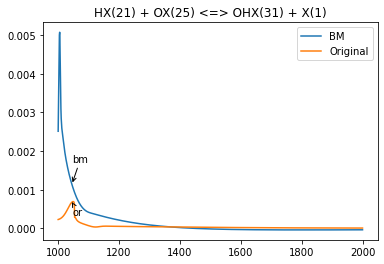

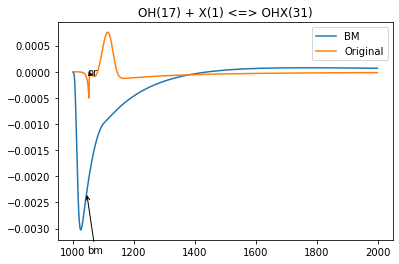

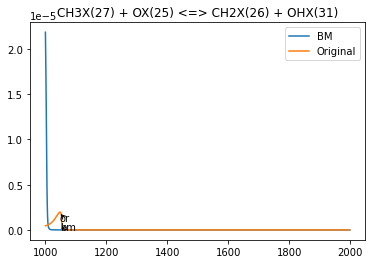

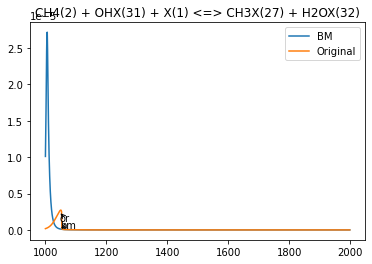

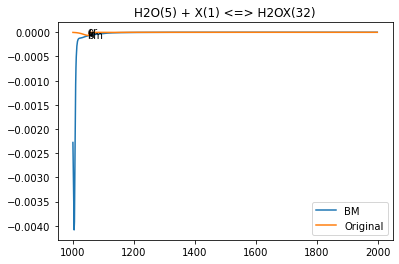

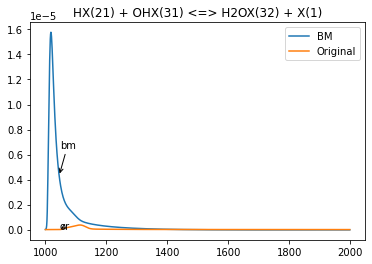

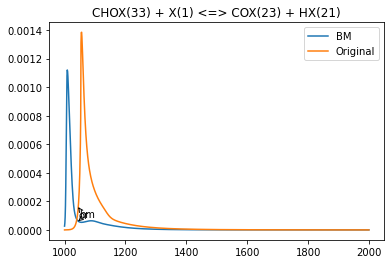

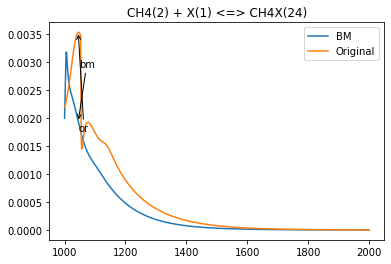

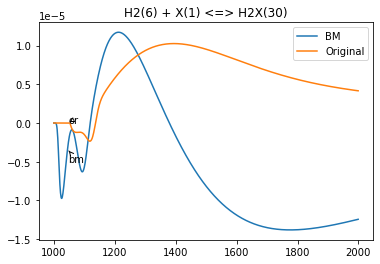

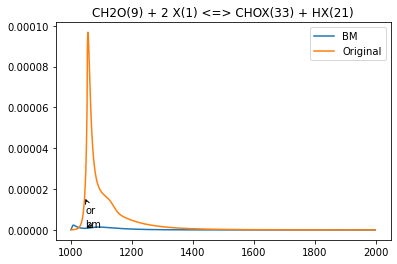

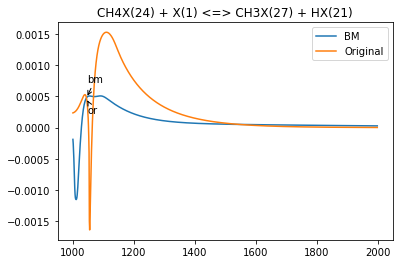

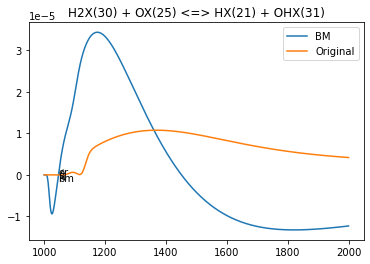

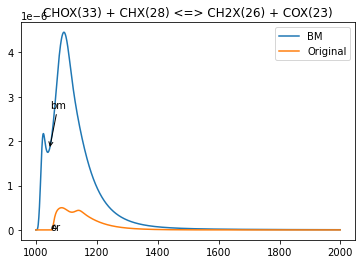

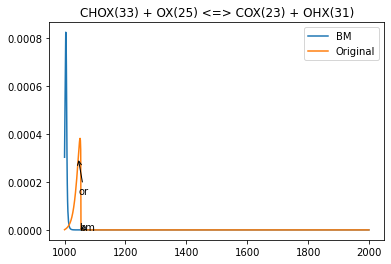

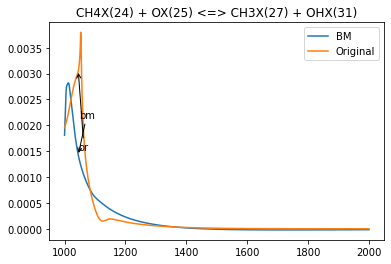

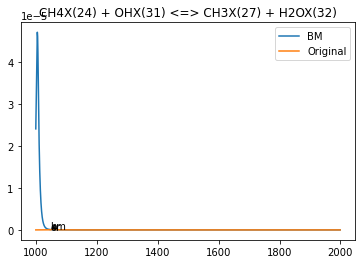

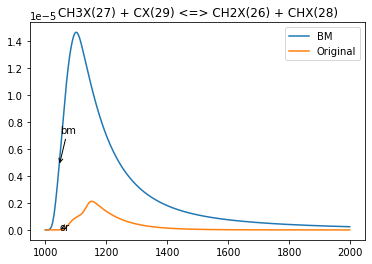

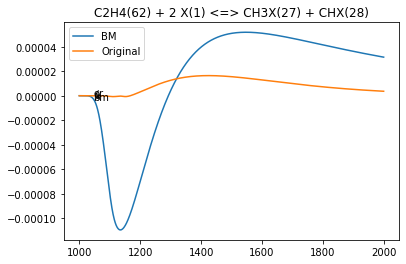

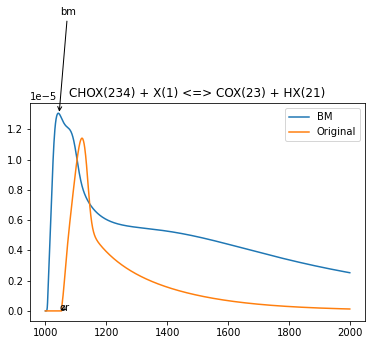

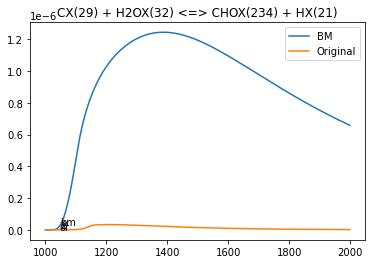

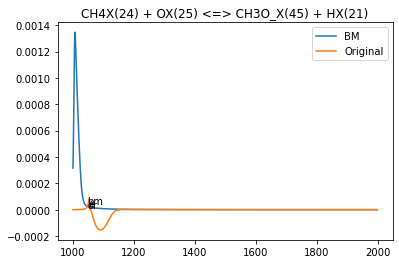

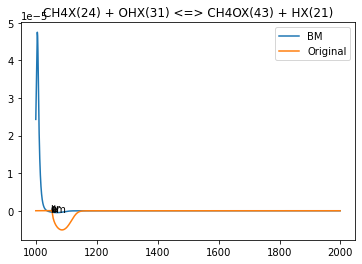

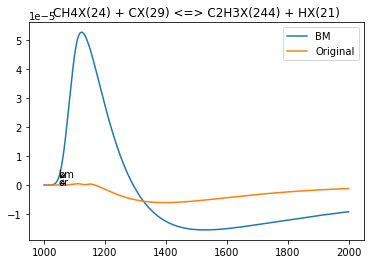

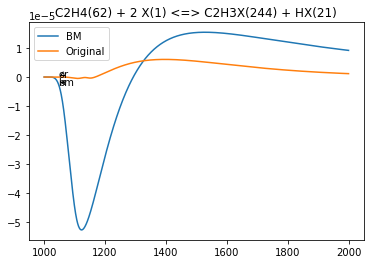

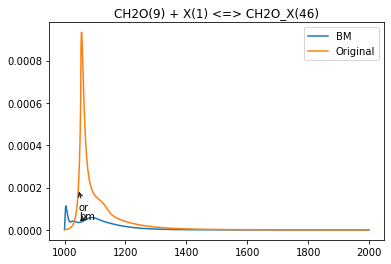

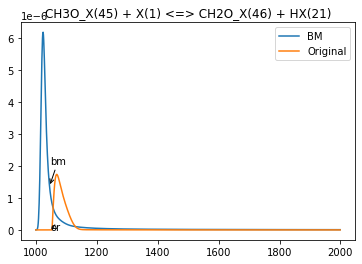

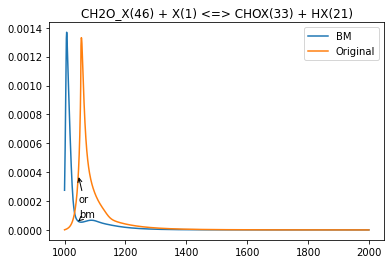

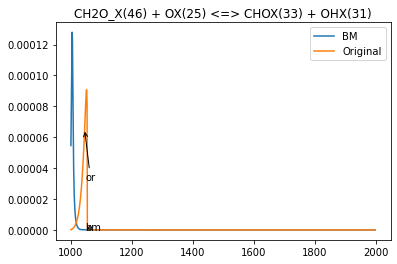

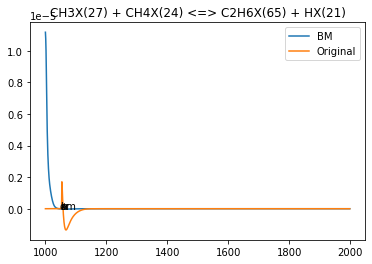

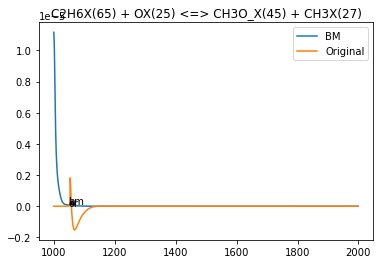

In [19]:
for i in range(1, 108):
    rates_bm = df_bm.iloc[1000:2000, i]
    rates_or = df_or.iloc[1000:2000, i]
    if rates_bm.max() > 1e-6 or rates_bm.max() > 1e-6:
        plt.plot(list(rates_bm.index), rates_bm, label='BM')
        plt.plot(list(rates_bm.index), rates_or, label='Original')
        plt.title(str(pes_plot_1.surf.reaction(i-1).equation))
        plt.annotate('bm', xy=(1045, df_bm.iloc[1045, i]), xytext=(1045 + 2, 1.5*df_bm.iloc[1045, i]), arrowprops=dict(facecolor='blue', arrowstyle='->'))
        plt.annotate('or', xy=(1045, df_or.iloc[1045, i]), xytext=(1045 + 2, 0.5*df_or.iloc[1045, i]), arrowprops=dict(facecolor='orange', arrowstyle='->'))
        plt.legend()
        plt.show()

# BM  rates comparison between model 3 and model 10

In [58]:
df_bm3 = pd.read_csv('/work/westgroup/chao/bm_project/base_bm/binding_energies/3.0_c-5.50o-3.75/rates_of_progress/net_rates_0.6.csv')
df_bm10 = pd.read_csv('/work/westgroup/chao/bm_project/base_bm/binding_energies/10.0_c-5.75o-3.25/rates_of_progress/net_rates_0.6.csv')

[]

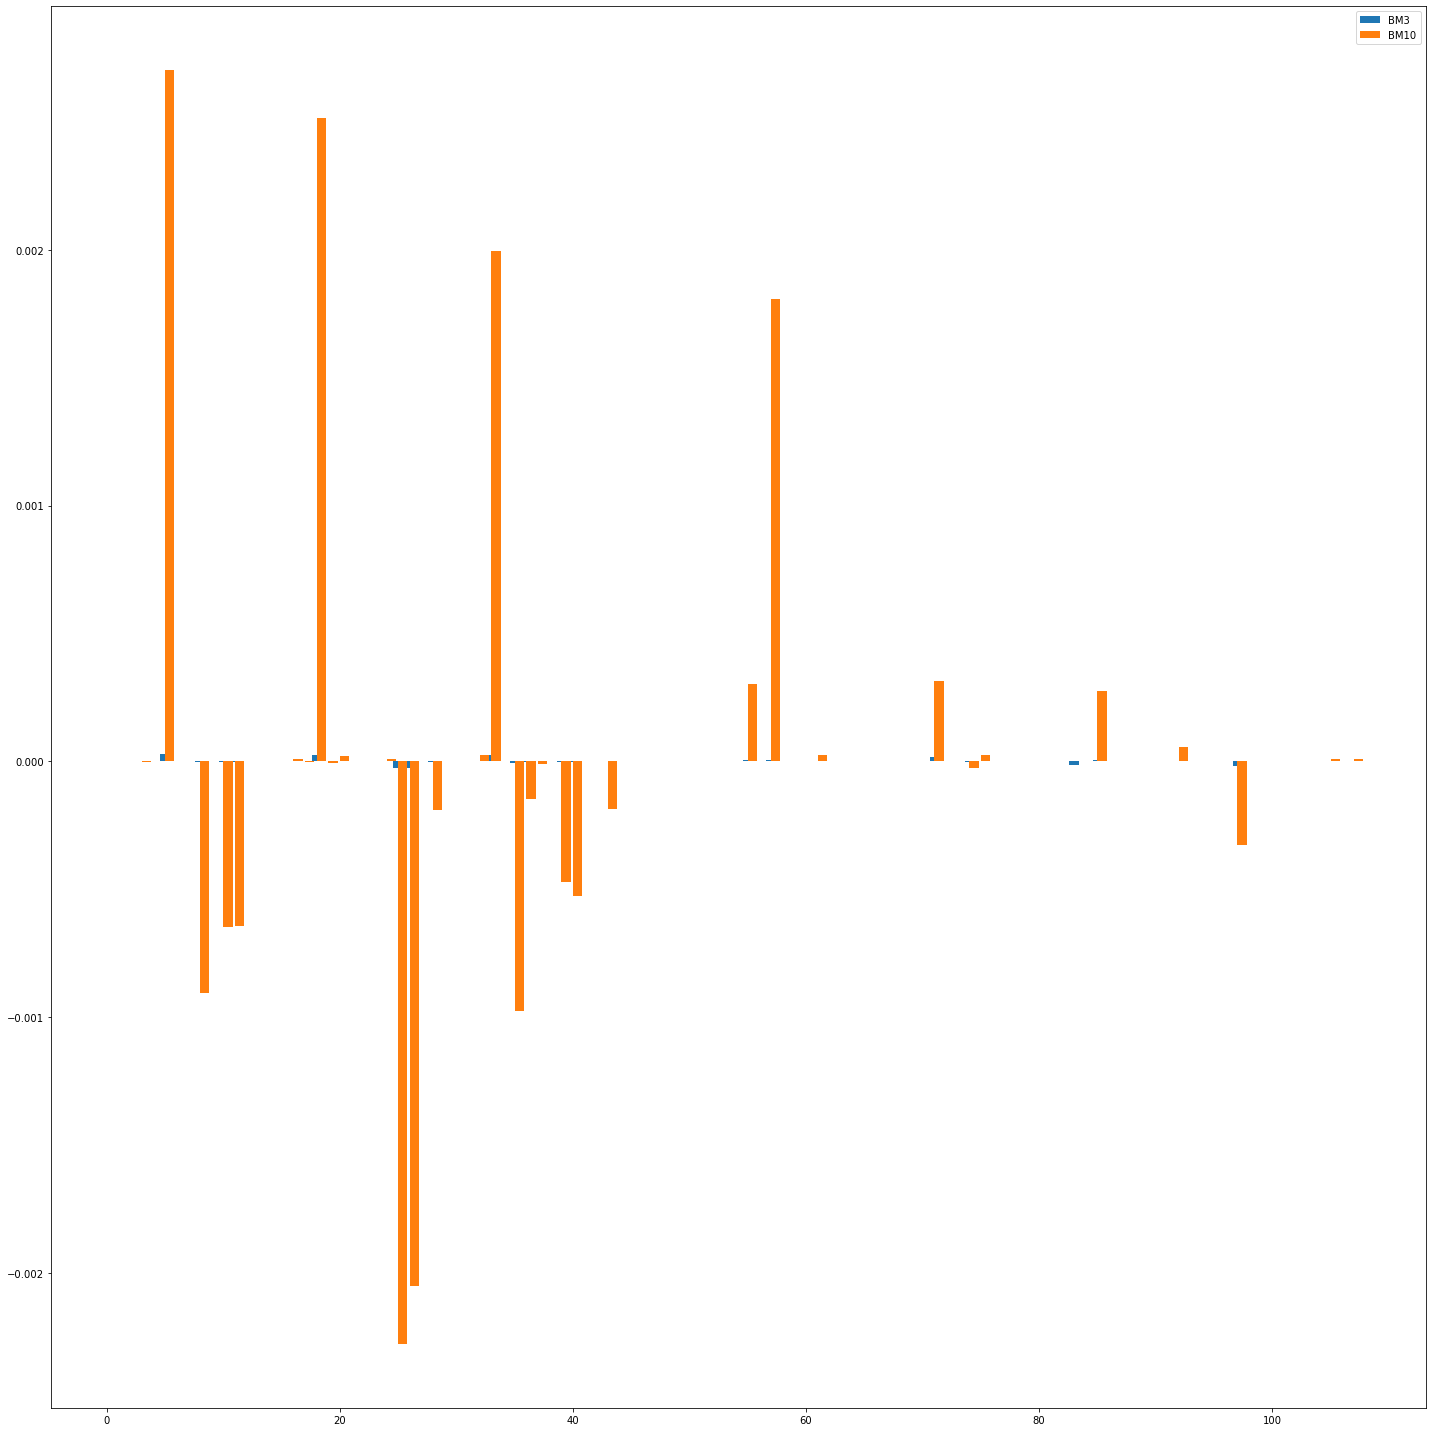

In [62]:
rates_bm = np.array([df_bm3.iloc[1000, i] for i in range(1,108)])
rates_or = np.array([df_bm10.iloc[1000, i] for i in range(1,108)])
plt.figure(figsize=(20, 20))
# plt.bar(range(1, 108), np.log10(np.abs(rates_bm)), label='BM')
# plt.bar(range(1, 108), np.log10(np.abs(rates_or)), label='Original')
plt.bar(range(1, 108), rates_bm, label='BM3')
plt.bar(np.array(range(1, 108))+0.4, rates_or, label='BM10')
plt.legend()
plt.tight_layout()
plt.plot()